In [1]:
#imports for data exploration and analysis
import pandas as pd
import numpy as np
#imports for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#importing models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pickle

import warnings 
warnings.filterwarnings('ignore')


In [2]:
#training data
wine_train_df = pd.read_csv('wine_data/train_wine_data.csv') 
wine_train_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
1,white,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
2,white,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3,white,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6
4,white,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5


In [3]:
wine_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  32485 non-null  object 
 1   fixed_acidity         32485 non-null  float64
 2   volatile_acidity      32485 non-null  float64
 3   citric_acid           32485 non-null  float64
 4   residual_sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free_sulfur_dioxide   32485 non-null  float64
 7   total_sulfur_dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 3.2+ MB


In [4]:
wine_train_df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_train_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


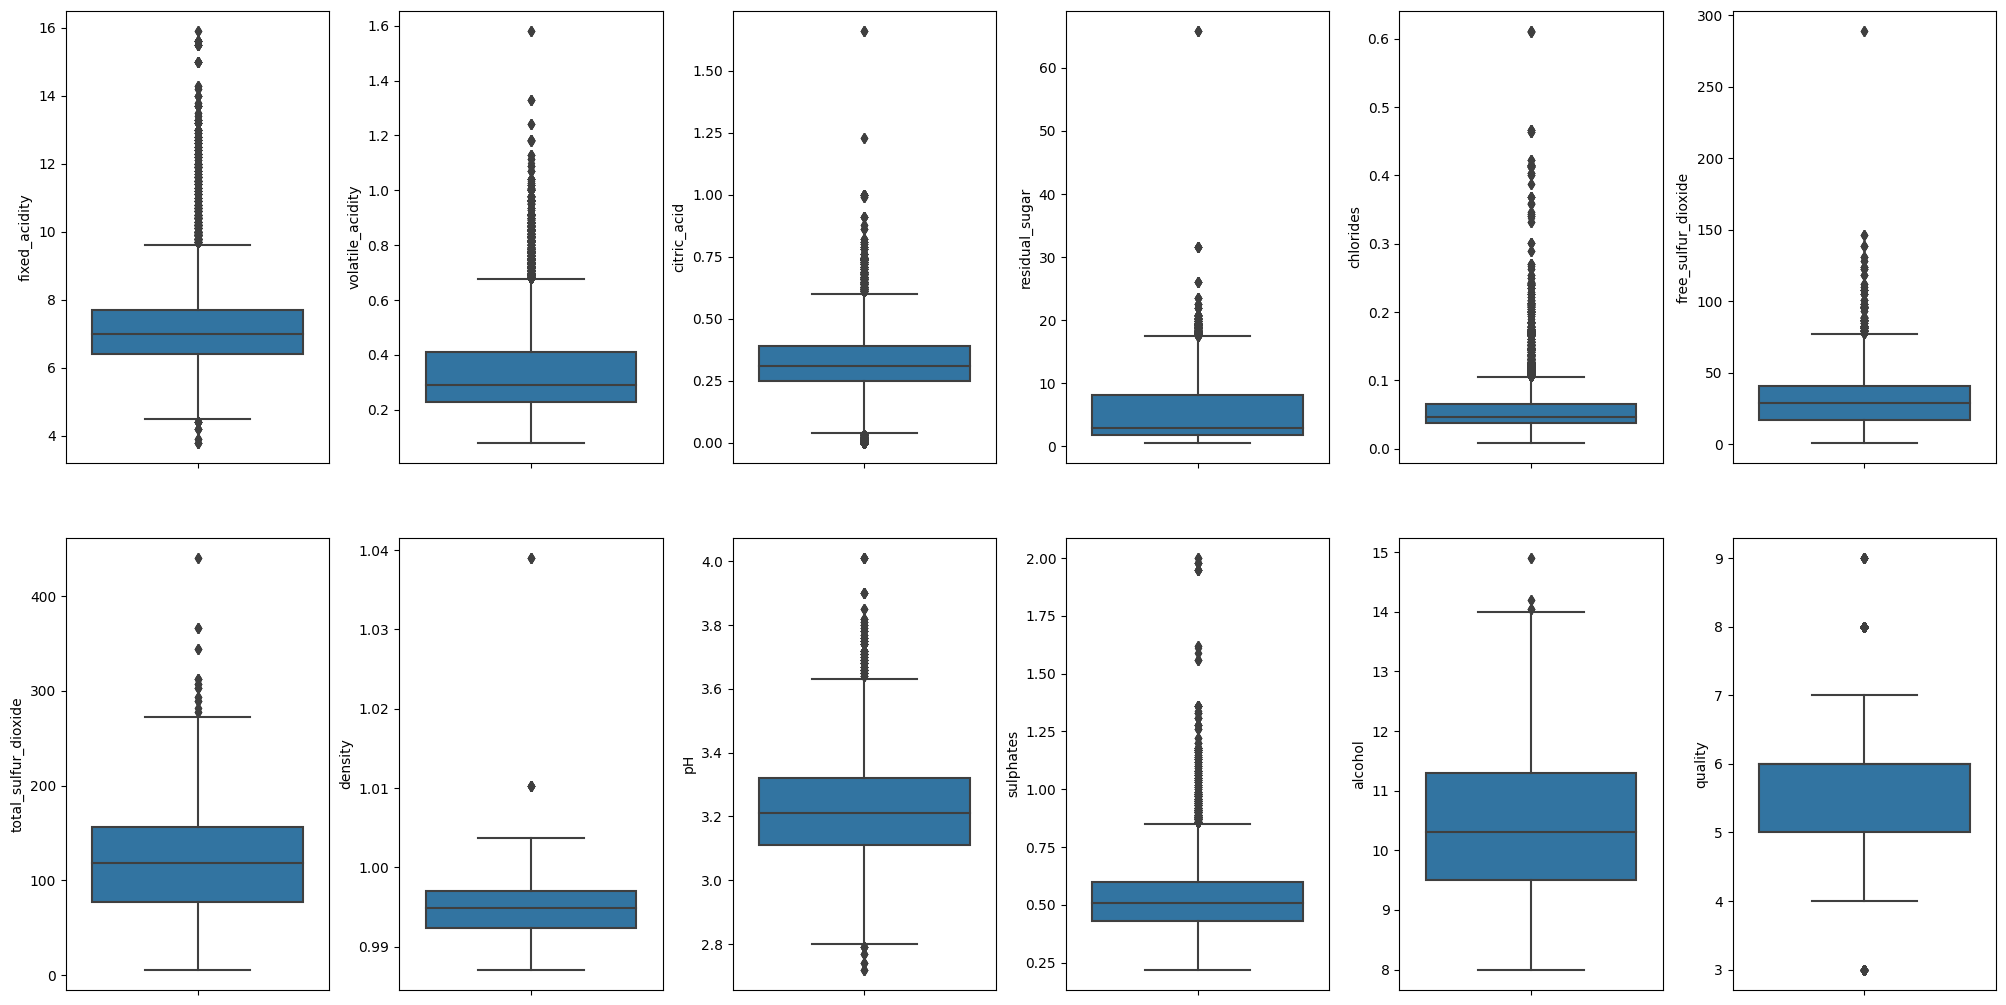

In [6]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in wine_train_df.items():
 if col != 'type':
    sns.boxplot(y=col, data=wine_train_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot: >

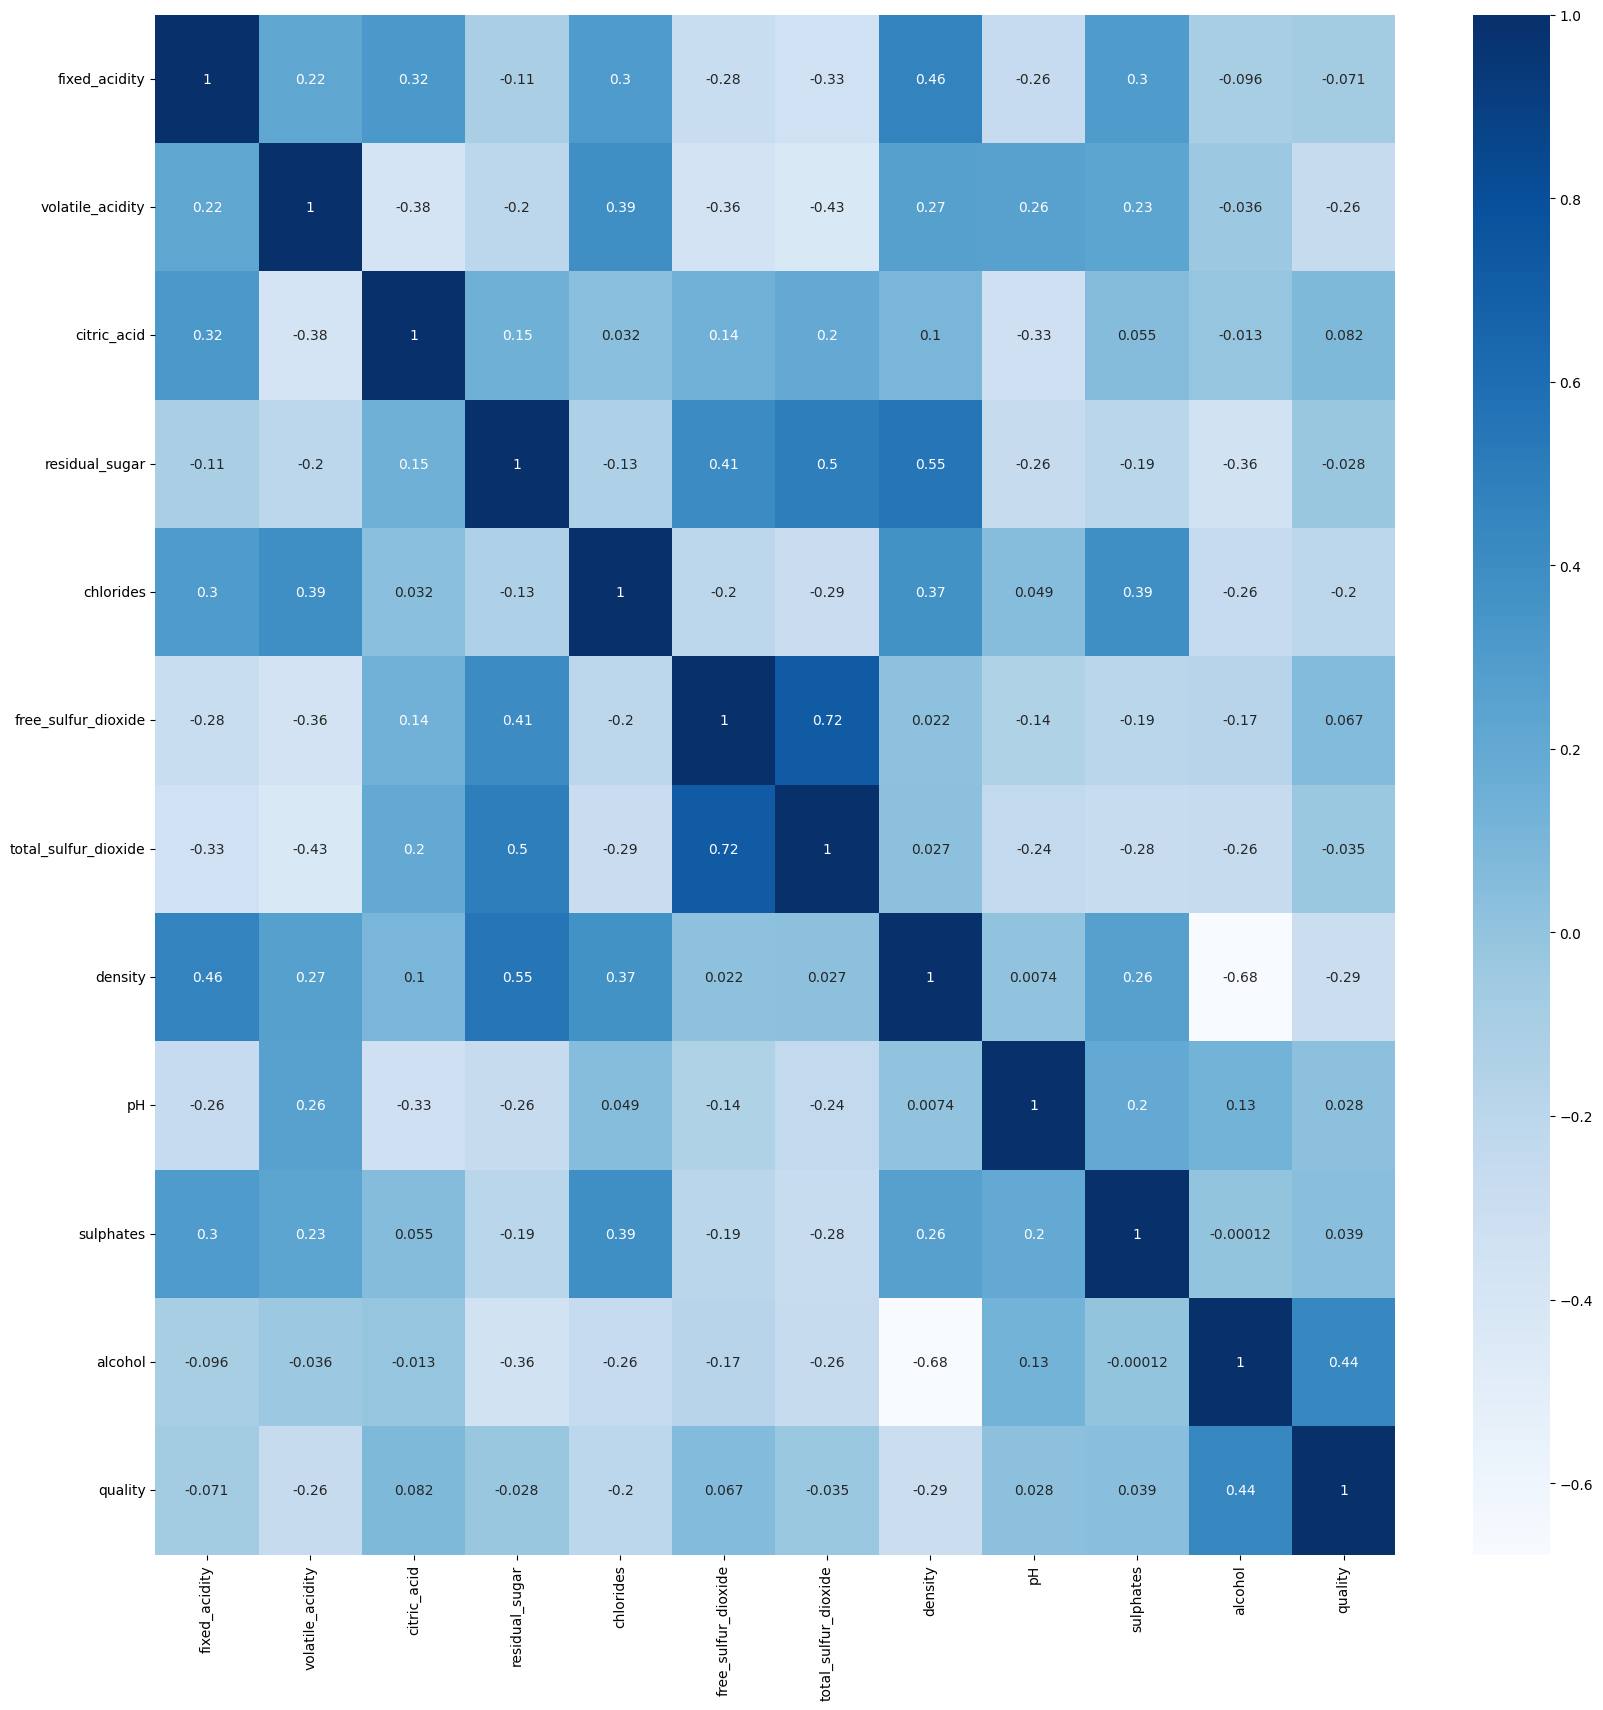

In [7]:
#checking which values affect wine quality
wine_test = wine_train_df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(wine_test, cmap = 'Blues', annot = True)

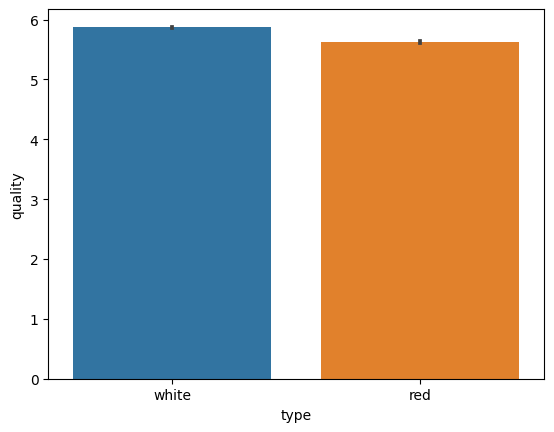

In [8]:
#checking if the type of wine will affect the quality
sns.barplot(data=wine_train_df, x='type', y='quality')
plt.show()

<AxesSubplot: xlabel='quality', ylabel='Density'>

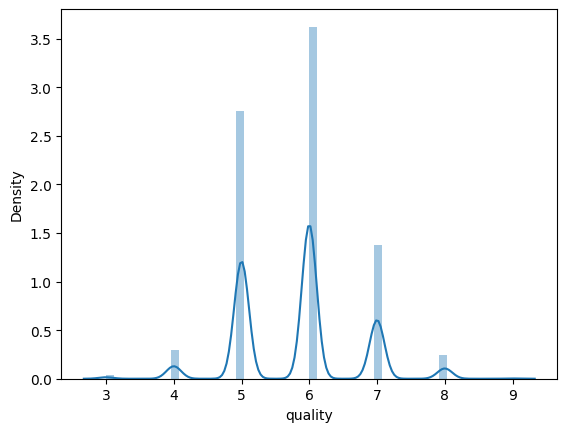

In [9]:
#distribution of wine quality
sns.distplot(wine_train_df['quality'])

In [10]:
wine_train_df['quality'].describe(percentiles=[0.95, 0.98, 0.99])

count    32485.000000
mean         5.811698
std          0.872474
min          3.000000
50%          6.000000
95%          7.000000
98%          8.000000
99%          8.000000
max          9.000000
Name: quality, dtype: float64

In [11]:
from sklearn.preprocessing import OneHotEncoder

#encoding the wine types as 1 and 0 with respect to red to be computated

encoder = OneHotEncoder(sparse=False)

encode_types = encoder.fit_transform(wine_train_df['type'].values.reshape(-1, 1))
encode_types

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
encoder.categories_

[array(['red', 'white'], dtype=object)]

In [13]:
label= ['red','white']
wine_types = pd.DataFrame(encode_types, columns= label)

In [14]:
wine_types.value_counts()

red  white
0.0  1.0      24453
1.0  0.0       8032
dtype: int64

In [15]:
wine_types['red'].value_counts()

0.0    24453
1.0     8032
Name: red, dtype: int64

In [16]:
#confirming the presence of the encoded column
wine_train_df['red_wine'] = wine_types['red']

wine_train_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,white,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,0.0
1,white,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,0.0
2,white,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,0.0
3,white,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0.0
4,white,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0.0


In [17]:
X_train = wine_train_df.drop(columns=['type','quality'])
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,red_wine
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,0.0
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,0.0
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,0.0
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,0.0
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32480,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,0.0
32481,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,0.0
32482,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,0.0
32483,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,0.0


In [18]:
target = 'quality'
y_train = wine_train_df[target].values
y_train

array([6, 6, 6, ..., 6, 7, 4], dtype=int64)

In [19]:
#trying with random forest regression

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_train)

rmse = mean_squared_error(y_train,y_pred,squared=False)
accuracy = r2_score(y_train,y_pred)

print('RandomForestRegressor')
print (f'RMSE: ',{rmse})
print(f'Accuracy: ',{accuracy})

RandomForestRegressor
RMSE:  {0.027071980054071056}
Accuracy:  {0.999037171881531}


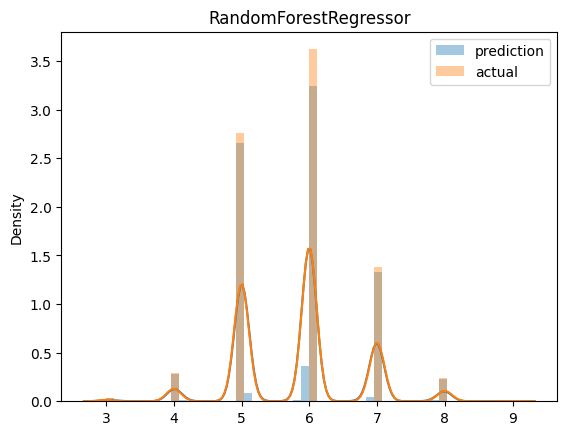

In [20]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.title(f'RandomForestRegressor')

plt.legend()

In [21]:
#trying with random forest classifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_train)

rmse = mean_squared_error(y_train,y_pred,squared=False)
accuracy = r2_score(y_train,y_pred)

print('RandomForestClassifier')
print (f'RMSE: ',{rmse})
print(f'Accuracy: ',{accuracy})

RandomForestClassifier
RMSE:  {0.0}
Accuracy:  {1.0}


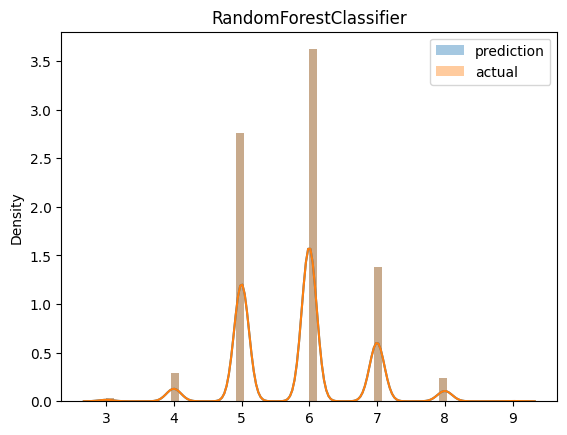

In [22]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.title('RandomForestClassifier')

plt.legend()

In [23]:
#trying with extra trees classifier

etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)

y_pred = etc.predict(X_train)

rmse = mean_squared_error(y_train,y_pred,squared=False)
accuracy = r2_score(y_train,y_pred)

print('ExtraTreesClassifier')
print (f'RMSE: ',{rmse})
print(f'Accuracy: ',{accuracy})

ExtraTreesClassifier
RMSE:  {0.0}
Accuracy:  {1.0}


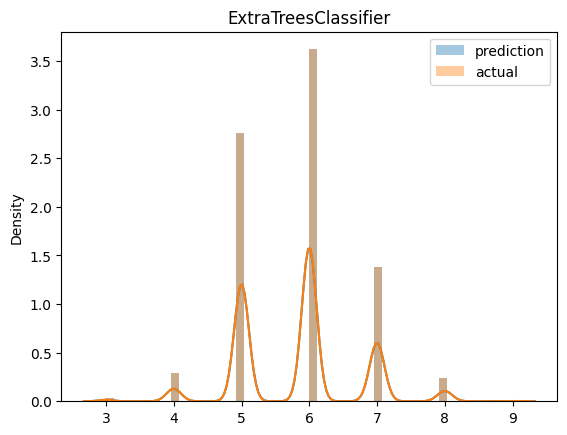

In [24]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.title('ExtraTreesClassifier')

plt.legend()

In [25]:
#trying with extra trees classifier

dtc =  DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = etc.predict(X_train)

rmse = mean_squared_error(y_train,y_pred,squared=False)
accuracy = r2_score(y_train,y_pred)

print('DecisionTreeClassifier')
print (f'RMSE: ',{rmse})
print(f'Accuracy: ',{accuracy})

DecisionTreeClassifier
RMSE:  {0.0}
Accuracy:  {1.0}


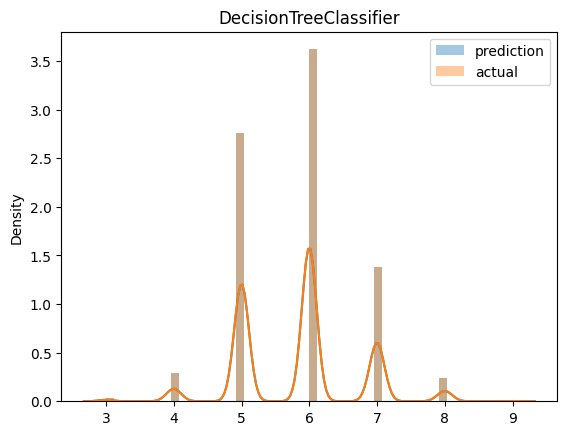

In [26]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')
plt.title('DecisionTreeClassifier')

plt.legend()

In [27]:
#trying with kNeighbors Regression

knr = KNeighborsRegressor(n_neighbors=5) 
knr.fit(X_train, y_train)

y_pred = knr.predict(X_train)

rmse = mean_squared_error(y_train,y_pred,squared=False)
accuracy = r2_score(y_train,y_pred)


print (f'RMSE: ',{rmse})
print(f'Accuracy: ',{accuracy})

RMSE:  {0.16338349530598967}
Accuracy:  {0.9649308622642955}


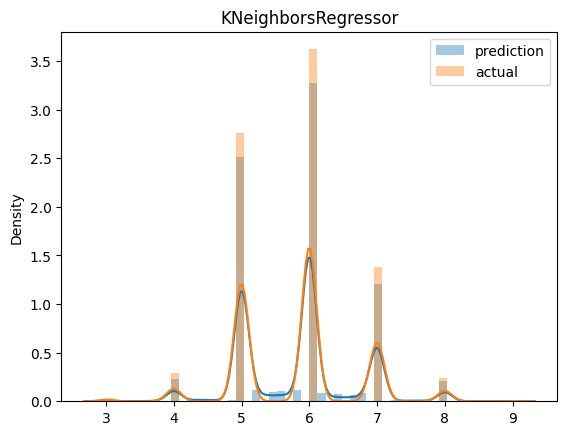

In [28]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.title('KNeighborsRegressor')
plt.legend()

In [29]:
#reading the data with a function to avoid too much repetition
def read_dafaframe(filename):
    df = pd.read_csv(filename)

    encoder = OneHotEncoder(sparse=False)

    encoded_types = encoder.fit_transform(df['type'].values.reshape(-1, 1))

    label= ['red','white']
    wine_types = pd.DataFrame(encoded_types, columns= label)

    df['red_wine'] = wine_types['red']

    return df

In [30]:
train_df = read_dafaframe('wine_data/train_wine_data.csv')
#adding a validation dataset
validation_df = read_dafaframe('wine_data/test_wine_data.csv')

In [31]:
train_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,white,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,0.0
1,white,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,0.0
2,white,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,0.0
3,white,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,0.0
4,white,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,0.0


In [32]:
validation_df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


In [33]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  red_wine              6497 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 710.7+ KB


In [34]:
#filling in the mean values

for col, value in validation_df.items():
 if col != 'type':
    validation_df[col] = validation_df[col].fillna(validation_df[col].mean())
validation_df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [35]:
trained_dict =  train_df.drop(columns=['type','quality'])
val_dict =  validation_df.drop(columns=['type','quality'])

In [36]:
X_train = trained_dict
X_val = val_dict

In [37]:
target = 'quality'
y_train = train_df[target].values

y_val = validation_df[target].values

In [39]:
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_val)

with open('models/random_forest_reg.bin','wb') as f_out:
    pickle.dump((rfr),f_out)

rmse = mean_squared_error(y_val,y_pred_rfr,squared=False)
accuracy = r2_score(y_val, y_pred_rfr)

print('RandomForestRegressor')
print(f'RMSE: {rmse}')
print(f'Accuracy: {accuracy}')

RandomForestRegressor
RMSE: 0.08215843046127176
Accuracy: 0.9911470362380227


In [40]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_val)

with open('models/rfc.bin','wb') as f_out:
    pickle.dump((rfc),f_out)

rmse = mean_squared_error(y_val,y_pred_rfc,squared=False)
accuracy = r2_score(y_val, y_pred_rfc)

print('RandomForestClassifier')
print(f'RMSE: {rmse}')
print(f'Accuracy: {accuracy}')

RandomForestClassifier
RMSE: 0.06681016826772575
Accuracy: 0.9941457731172564


In [41]:
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_val)

with open('models/etc.bin','wb') as f_out:
    pickle.dump((etc),f_out)

rmse = mean_squared_error(y_val,y_pred_etc,squared=False)
accuracy = r2_score(y_val,y_pred_etc)

print('ExtraTreesClassifier')
print (f'RMSE: ',{rmse})
print(f'Accuracy: ',{accuracy})

ExtraTreesClassifier
RMSE:  {0.0632601533851334}
Accuracy:  {0.9947513827947816}


In [42]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_val)


with open('models/kn_reg.bin','wb') as f_out:
    pickle.dump((knr),f_out)

rmse = mean_squared_error(y_val,y_pred_knr,squared=False)
accuracy = r2_score(y_val, y_pred_knr)

print('KNeighborsRegressor')
print(f'RMSE: {rmse}')
print(f'Accuracy: {accuracy}')

KNeighborsRegressor
RMSE: 0.260202026623686
Accuracy: 0.9112014716834054
